In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:19<00:00, 8.66MB/s]


horse   cat plane  ship


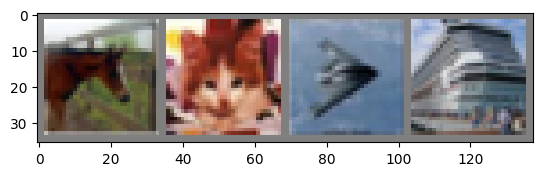

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


class Net(nn.Module):
    def __init__(self, num_classes=10):
        super(Net, self).__init__()

        self.conv3_1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn3_1   = nn.BatchNorm2d(64)

        self.conv3_2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn3_2   = nn.BatchNorm2d(128)

        self.conv3_3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3_3   = nn.BatchNorm2d(256)

        self.conv5_1 = nn.Conv2d(3, 64, 5, padding=2)
        self.bn5_1   = nn.BatchNorm2d(64)

        self.conv5_2 = nn.Conv2d(64, 128, 5, padding=2)
        self.bn5_2   = nn.BatchNorm2d(128)

        self.conv5_3 = nn.Conv2d(128, 256, 5, padding=2)
        self.bn5_3   = nn.BatchNorm2d(256)

        self.conv3_4 = nn.Conv2d(512, 256, 3, padding=1)
        self.bn3_4   = nn.BatchNorm2d(256)

        self.conv5_4 = nn.Conv2d(512, 256, 5, padding=2)
        self.bn5_4   = nn.BatchNorm2d(256)

        self.pool = nn.MaxPool2d(2, 2)

        self.conv3_5 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn3_5   = nn.BatchNorm2d(256)

        self.conv3_6 = nn.Conv2d(256, 128, 3, padding=1)
        self.bn3_6   = nn.BatchNorm2d(128)

        self.conv5_5 = nn.Conv2d(256, 256, 5, padding=2)
        self.bn5_5   = nn.BatchNorm2d(256)

        self.conv5_6 = nn.Conv2d(256, 128, 5, padding=2)
        self.bn5_6   = nn.BatchNorm2d(128)

        self.conv3_7 = nn.Conv2d(256, 128, 3, padding=1)
        self.bn3_7   = nn.BatchNorm2d(128)

        self.conv5_7 = nn.Conv2d(256, 128, 5, padding=2)
        self.bn5_7   = nn.BatchNorm2d(128)

        self.conv3_8  = nn.Conv2d(128, 64, 3, padding=1)
        self.bn3_8    = nn.BatchNorm2d(64)

        self.conv3_9  = nn.Conv2d(64, 32, 3, padding=1)
        self.bn3_9    = nn.BatchNorm2d(32)

        self.conv3_10 = nn.Conv2d(32, 16, 3, padding=1)
        self.bn3_10   = nn.BatchNorm2d(16)

        self.conv5_8  = nn.Conv2d(128, 64, 5, padding=2)
        self.bn5_8    = nn.BatchNorm2d(64)

        self.conv5_9  = nn.Conv2d(64, 32, 5, padding=2)
        self.bn5_9    = nn.BatchNorm2d(32)

        self.conv5_10 = nn.Conv2d(32, 16, 5, padding=2)
        self.bn5_10   = nn.BatchNorm2d(16)

        self.fc1 = nn.Linear(32 * 4 * 4, 84)
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):

        x3 = F.relu(self.bn3_1(self.conv3_1(x)))
        x3 = F.relu(self.bn3_2(self.conv3_2(x3)))
        x3 = F.relu(self.bn3_3(self.conv3_3(x3)))

        x5 = F.relu(self.bn5_1(self.conv5_1(x)))
        x5 = F.relu(self.bn5_2(self.conv5_2(x5)))
        x5 = F.relu(self.bn5_3(self.conv5_3(x5)))

        x = torch.cat([x3, x5], dim=1)

        x_main = F.relu(self.bn3_4(self.conv3_4(x)))
        x_skip = F.relu(self.bn5_4(self.conv5_4(x)))
        x = x_main + x_skip

        x = self.pool(x)

        x3 = F.relu(self.bn3_5(self.conv3_5(x)))
        x3 = F.relu(self.bn3_6(self.conv3_6(x3)))

        x5 = F.relu(self.bn5_5(self.conv5_5(x)))
        x5 = F.relu(self.bn5_6(self.conv5_6(x5)))

        x = torch.cat([x3, x5], dim=1)

        x_main = F.relu(self.bn3_7(self.conv3_7(x)))
        x_skip = F.relu(self.bn5_7(self.conv5_7(x)))
        x = x_main + x_skip

        x = self.pool(x)

        x3 = F.relu(self.bn3_8(self.conv3_8(x)))
        x3 = F.relu(self.bn3_9(self.conv3_9(x3)))

        x5 = F.relu(self.bn5_8(self.conv5_8(x)))
        x5 = F.relu(self.bn5_9(self.conv5_9(x5)))

        x = x3 + x5

        x_main = F.relu(self.bn3_10(self.conv3_10(x)))
        x_skip = F.relu(self.bn5_10(self.conv5_10(x)))

        x = torch.cat([x_main, x_skip], dim=1)
        x = self.pool(x)

        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x


net = Net().to(device)
from torchsummary import summary
net = net.to(device)
summary(net, (3, 32, 32))

Using device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3          [-1, 128, 32, 32]          73,856
       BatchNorm2d-4          [-1, 128, 32, 32]             256
            Conv2d-5          [-1, 256, 32, 32]         295,168
       BatchNorm2d-6          [-1, 256, 32, 32]             512
            Conv2d-7           [-1, 64, 32, 32]           4,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
            Conv2d-9          [-1, 128, 32, 32]         204,928
      BatchNorm2d-10          [-1, 128, 32, 32]             256
           Conv2d-11          [-1, 256, 32, 32]         819,456
      BatchNorm2d-12          [-1, 256, 32, 32]             512
           Conv2d-13          [-1, 256, 32, 32]       1,179,904
      BatchNorm2d-14

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0

    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 200 == 199:
            print(f"[Epoch {epoch+1}, Batch {i+1}] "
                  f"loss: {running_loss / 200:.4f}")
            running_loss = 0.0

    torch.save({
        'epoch': epoch,
        'model_state_dict': net.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss.item(),
    }, '/content/checkpoint.pth')

print('Finished Training')


[Epoch 1, Batch 200] loss: 1.1236
[Epoch 1, Batch 400] loss: 1.0978
[Epoch 1, Batch 600] loss: 1.1247
[Epoch 1, Batch 800] loss: 1.0598
[Epoch 1, Batch 1000] loss: 1.0501
[Epoch 1, Batch 1200] loss: 1.1044
[Epoch 1, Batch 1400] loss: 1.0300
[Epoch 1, Batch 1600] loss: 1.0995
[Epoch 1, Batch 1800] loss: 1.0402
[Epoch 1, Batch 2000] loss: 1.0203
[Epoch 1, Batch 2200] loss: 1.0395
[Epoch 1, Batch 2400] loss: 1.0828
[Epoch 1, Batch 2600] loss: 1.0066
[Epoch 1, Batch 2800] loss: 0.9992
[Epoch 1, Batch 3000] loss: 0.9974
[Epoch 1, Batch 3200] loss: 0.9877
[Epoch 1, Batch 3400] loss: 0.9983
[Epoch 1, Batch 3600] loss: 0.9699
[Epoch 1, Batch 3800] loss: 0.9727
[Epoch 1, Batch 4000] loss: 0.9539
[Epoch 1, Batch 4200] loss: 0.9702
[Epoch 1, Batch 4400] loss: 0.9825
[Epoch 1, Batch 4600] loss: 0.9789
[Epoch 1, Batch 4800] loss: 0.9343
[Epoch 1, Batch 5000] loss: 0.9288
[Epoch 1, Batch 5200] loss: 0.9262
[Epoch 1, Batch 5400] loss: 0.9759
[Epoch 1, Batch 5600] loss: 0.9501
[Epoch 1, Batch 5800] lo

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



GroundTruth:    cat  ship  ship plane


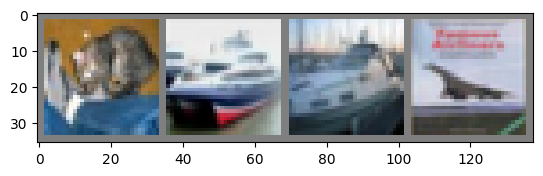

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        inputs, labels = inputs.to(device), labels.to(device)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 84 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 85 %
Accuracy of   car : 91 %
Accuracy of  bird : 69 %
Accuracy of   cat : 70 %
Accuracy of  deer : 83 %
Accuracy of   dog : 85 %
Accuracy of  frog : 86 %
Accuracy of horse : 88 %
Accuracy of  ship : 89 %
Accuracy of truck : 92 %
